# Imports
Run First

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Bert lib
!pip install transformers
#usefull in cleaning the data
!pip install pyarabic
!pip install langdetect
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.1 MB/s 
     |████████████████████████████████| 101 kB 14.4 MB/s 
     |████████████████████████████████| 6.6 MB 53.2 MB/s 
     |████████████████████████████████| 596 kB 85.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 8.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3ddc696cf451f944e8c0129c7aee32ef70e1e1aa8b06ade39293bd634a6ea87e
  Stored in directory: /root/.cache/pip/wheels/c5/

In [ ]:
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from collections import OrderedDict
import torch
from operator import itemgetter
import nltk
from nltk.corpus import stopwords
from sklearn.utils import class_weight
import re
from sklearn.model_selection import train_test_split
import logging
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [ ]:
#loading the data from the drive file "Shahd_project" and removing the header
df_Data = pd.read_csv('/content/drive/MyDrive/Shahd_project/third training sample.csv',header=0)
df_Data = df_Data.iloc[1:]

#specifying data coloumns in the file
DATA_COLUMN = 'Text'
LABEL_COLUMN = 'Discourse'

df_Data = df_Data[['Text', 'Discourse']]
df_Data.columns = [DATA_COLUMN, LABEL_COLUMN]

#mapping classes to indices and removing empty examples
label_map = {
    'Sympathy' : 0,
    'Escalation' : 1,
    'Announcement' : 2,
}

df_Data = df_Data.dropna()
df_Data = df_Data.sample(frac=1).reset_index(drop=True)
df_Data[LABEL_COLUMN] = df_Data[LABEL_COLUMN].apply(lambda x: label_map[x])


# train_AJGT, test_AJGT = train_test_split(df_AJGT, test_size=0.2,random_state=42)


In [ ]:
%load_ext google.colab.data_table

In [ ]:
df_test_Data = pd.read_csv('/content/drive/MyDrive/Shahd_project/sampleforclassification.csv',header=0,  encoding="utf-8")
#df_test_Data = df_test_Data.iloc[1:]
df_test_Data["Discourse"] = ""
#specifying data coloumns in the file
DATA_COLUMN = 'Text'
LABEL_COLUMN = 'Discourse'#
ID = 'X'

df_test_Data = df_test_Data[['X','Text', 'Discourse']]
df_test_Data.columns = [ID ,DATA_COLUMN, LABEL_COLUMN]

#mapping classes to indices and removing empty examples
label_map = {
    'Sympathy' : 0,
    'Escalation' : 1,
    'Announcement' : 2,
}

df_test_Data = df_test_Data.dropna()
df_test_Data = df_test_Data.sample(frac=1).reset_index(drop=True)
#df_test_Data[LABEL_COLUMN] = df_test_Data[LABEL_COLUMN].apply(lambda x: label_map[x])

df_test_Data

,X,Text,Discourse
0,101189,@saharoz_ سوداني الجوه وجداني بررريده😍🇸🇩\n\nال...,
1,134473,قسما عظما \nمهما ح تعمل \nنحن ح نبقي وانت ح تم...,
2,132305,بطنا جابتك والله ما بتندم\n#تسقط_بس \n#موكب6ين...,
3,146885,#الريف28يناير\n#تسقط_بس\n#مدن_السودان_تنتفض\nد...,
4,27892,🎬\nمسرحية (مخربين في صيدلية)، بتثبت حقيقة واحد...,
...,...,...,...
149995,120328,التصوير والتوثيق مهم جدا ياجماعه ماضروري كلوا ...,
149996,149148,يوم الخميس نموت الشعب السودان ويحي الوطن.. #مد...,
149997,47681,#مجزره_القياده_العامة\nجلاليب العيد كفن .. صلا...,
149998,82094,هوووووي هوي هوي \n#موكب24يناير\n#تسقط_بس https...,


In [ ]:
#hashtags
df_test_Data['Text'] = df_test_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if "#"not in word]))

#links
df_test_Data['Text'] = df_test_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if "http"not in word]))

#mentions
df_test_Data['Text'] = df_test_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if "@"not in word]))

#Stopwords disabled
# df_Data['Text'] = df_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('arabic'))]))

#punctuation disabled
# df_Data['Text'] = df_Data['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_test_Data

df_test_Data["Discourse"] = pd.to_numeric(df_test_Data["Discourse"])
df_test_Data.dtypes['Discourse']

dtype('float64')

# Data Cleaning
cleaning the data from:
*   hashtags
*   links
*   mentions
*   Stopwords?
*   Emojis
*   punctuation


comment the line to remove the cleaning effect




In [ ]:
#hashtags
df_Data['Text'] = df_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if "#"not in word]))

#links
df_Data['Text'] = df_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if "http"not in word]))

#mentions
df_Data['Text'] = df_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if "@"not in word]))

#Stopwords disabled
# df_Data['Text'] = df_Data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('arabic'))]))

#punctuation disabled
# df_Data['Text'] = df_Data['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))



In [ ]:
#Emojis disabled
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
df_test_Data['Text'] = df_test_Data['Text'].apply(lambda x: emoji_pattern.sub(r'', x))

# Experiments
We will be doing two experiments.
*   First we will train the model only on ["Escalation", "Sympathy"] classes only.
*   Then we will train against the whole dataset



# EXP1

In [ ]:
# first we remove the raws where the Discourse is "Armed Conflict"(2)
df_Data_exp1 = df_Data[df_Data.Discourse != 2]

In [ ]:
df_test_Data

,X,Text,Discourse
0,595227,مواكب ما بتتراجع تاني ✌🏾 تقول لي الدنيـا انا س...,NaN
1,12198,امريكا بلت السودان بسبب زفت حميرتي وعملت رايحة...,NaN
2,123249,ما اشبهكم بالجهادية جهادية الحلبونا جهادية الن...,NaN
3,35087,تسقط بس ✌🇸🇩,NaN
4,137107,الجمعة 29 مارس مسجد الانصار ودنوباوي الان في ا...,NaN
...,...,...,...
149995,611968,طيب لما المواطنين كانو بموتو مالو ما اتكلم حسب...,NaN
149996,1355,أولا ثورتنا ثورة سلمية ولا نريد الشخصيات الذي ...,NaN
149997,419419,الشعب الاسرائيلي الشقيق 💋😂😂😂😂 حنفكر في الموضوع...,NaN
149998,279968,لـ الدعايـة والإعـلان .. لـ نشر تغريداتـك و من...,NaN


In [ ]:
#split the data into training and testing data
train_exp1, test_exp1 = train_test_split(df_Data_exp1, test_size=0.2,random_state=42)
print("Train size:", len(train_exp1))
print("---------------------------")
print("examples with Anger:", len(train_exp1[train_exp1["Discourse"] == 0]))
print("examples with Sympathy:", len(train_exp1[train_exp1["Discourse"] == 1]))
print("\n")

print("Test size:", len(test_exp1))
print("---------------------------")
print("examples with Anger:", len(test_exp1[test_exp1["Discourse"] == 0]))
print("examples with Sympathy:", len(test_exp1[test_exp1["Discourse"] == 1]))

Train size: 1532
---------------------------
examples with Anger: 500
examples with Sympathy: 817


Test size: 384
---------------------------
examples with Anger: 141
examples with Sympathy: 185


In [ ]:
#specify the device ["CPU","GPU"] that the training will run on ("cuda" == "GPU")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
class_weights=class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_exp1["Discourse"].values),y = train_exp1["Discourse"].values)
class_weights=torch.tensor(class_weights,dtype=torch.float)

In [ ]:
#loading the Sudabert model from Shahd_project file using transformers pytorch library, we also load the tokenizer from SudaBert file
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/Shahd_project/new_sudaBERT')

tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/Shahd_project/new_sudaBERT')
model.to(device)


In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(train_exp1)

In [ ]:
def encode(examples):
    return tokenizer(examples['Text'], truncation=True, padding='max_length', max_length=128)

dataset = dataset.map(encode, batched=True)
# dataset[0]

In [ ]:
dataset = dataset.map(lambda examples: {'labels': examples['Discourse']}, batched=True)

In [ ]:
import torch
dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32)
next(iter(dataloader))

In [ ]:
from tqdm import tqdm
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.train().to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)
for epoch in range(3):
    for i, batch in enumerate(tqdm(dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        # logits = outputs['logits']
        # criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
        # loss = criterion(logits,batch["labels"] )
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if i % 10 == 0:
            print(f"loss: {loss}")

In [ ]:
#eval dataset
eval_dataset = Dataset.from_pandas(test_exp1)
eval_dataset = eval_dataset.map(encode, batched=True)
eval_dataset = eval_dataset.map(lambda examples: {'labels': examples['Discourse']}, batched=True)
eval_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
eval_dataloader = torch.utils.data.DataLoader(eval_dataset, batch_size=32)
next(iter(eval_dataloader))


In [ ]:

# Evaluation Function

y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for i, batch in enumerate(tqdm(eval_dataloader)):
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs = model(**batch)
      batch_predictions = torch.argmax(outputs[1], 1)
      y_pred.extend(batch_predictions.tolist())
      y_true.extend(batch["labels"].tolist())

print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.xaxis.set_ticklabels(['Sympathy', 'Anger'])
ax.yaxis.set_ticklabels(['Sympathy', 'Anger'])
    
# best_model = BERT().to(device)

# load_checkpoint(destination_folder + '/model.pt', best_model)



# EXP2

In [ ]:
# first we remove the raws where the Discourse is "Armed Conflict"(2)
df_Data_exp2 = df_Data

In [ ]:
df_Data_exp2

,Text,Discourse
0,الله ارحم خالي الشهيد عزمي فتحي واجعل مثواه ال...,0
1,العصيان المدني الشامل وتوقف الحياة العامة الى ...,1
2,بكرا مفروض يكون عيد الوطن وفجر الخلاص وتشييع ا...,1
3,موظفي بنك الخرطوم شارع الجمهورية .. دم الشهيد ...,1
4,قصي حمدتو شهيد جديد.. الدفن الساعة ٣ عصرا بمقا...,2
...,...,...
2161,متزكرين الشهيد يا البتقولوا فك اعتصام ، القصاص بس,1
2162,نسأل الله ان تعدي ال 24ساعة القادمة علي خير......,1
2163,العامل لايف لي محطة بحري في انتظار قطار عطبرة ...,0
2164,لا حصانة للقتلة ، دم الشهيد ما هملة ✌💜,1


In [ ]:
#split the data into training and testing data
train_exp2, test_exp2 = train_test_split(df_Data_exp2, test_size=0.2,random_state=42)
print("Train size:", len(train_exp2))
print("---------------------------")
print("examples with Sympathy:", len(train_exp2[train_exp2["Discourse"] == 0]))
#print("examples with Anger:", len(train_exp2[train_exp2["Discourse"] == 1]))
print("examples with Escalation:", len(train_exp2[train_exp2["Discourse"] == 1]))
print("examples with Announcement:", len(train_exp2[train_exp2["Discourse"] == 2]))
print("\n")

print("Test size:", len(test_exp2))
print("---------------------------")
print("examples with Sympathy:", len(test_exp2[test_exp2["Discourse"] == 0]))
#print("examples with Anger:", len(test_exp2[test_exp2["Discourse"] == 1]))
print("examples with Escalation:", len(test_exp2[test_exp2["Discourse"] == 1]))
print("examples with Announcement:", len(train_exp2[train_exp2["Discourse"] == 2]))

Train size: 1732
---------------------------
examples with Sympathy: 509
examples with Escalation: 954
examples with Announcement: 269


Test size: 434
---------------------------
examples with Sympathy: 142
examples with Escalation: 217
examples with Announcement: 269


In [ ]:
#specify the device ["CPU","GPU"] that the training will run on ("cuda" == "GPU")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
#loading the Sudabert model from Shahd_project file using transformers pytorch library, we also load the tokenizer from SudaBert file
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig

model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/Shahd_project/new_sudaBERT', num_labels=3)

tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/Shahd_project/new_sudaBERT')
model.to(device)


Some weights of the model checkpoint at /content/drive/MyDrive/Shahd_project/new_sudaBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequence

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(train_exp2)

In [ ]:
class_weights=class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_exp2["Discourse"].values),y = train_exp2["Discourse"].values)
class_weights=torch.tensor(class_weights,dtype=torch.float)

In [ ]:
def encode(examples):
    return tokenizer(examples['Text'], truncation=True, padding='max_length', max_length=128)

dataset = dataset.map(encode, batched=True)
# dataset[0]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
dataset = dataset.map(lambda examples: {'labels': examples['Discourse']}, batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
import torch
dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32)
next(iter(dataloader))

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[17028, 23303, 33152,  ..., 17029, 17029, 17029],
         [17028,  1677,   909,  ..., 17029, 17029, 17029],
         [17028, 17830,   910,  ..., 17029, 17029, 17029],
         ...,
         [17028,   114,   883,  ..., 17029, 17029, 17029],
         [17028,   461,  6388,  ..., 17029, 17029, 17029],
         [17028, 36781, 18525,  ..., 17029, 17029, 17029]]),
 'labels': tensor([0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
         0, 1, 0, 0, 1, 1, 0, 1]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]])}

In [ ]:
from tqdm import tqdm
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.train().to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)
for epoch in range(3):
    for i, batch in enumerate(tqdm(dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs['logits']
        criterion = torch.nn.CrossEntropyLoss(weight=class_weights).to(device)
        loss = criterion(logits,batch["labels"] )
        # loss = outputs[0]
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if i % 10 == 0:
            print(f"loss: {loss}")

  2%|▏         | 1/55 [00:03<02:54,  3.23s/it]

loss: 1.0458205938339233


 20%|██        | 11/55 [00:06<00:17,  2.49it/s]

loss: 1.054630160331726


 38%|███▊      | 21/55 [00:10<00:12,  2.64it/s]

loss: 0.8714064955711365


 56%|█████▋    | 31/55 [00:14<00:09,  2.65it/s]

loss: 0.9002312421798706


 75%|███████▍  | 41/55 [00:18<00:05,  2.65it/s]

loss: 0.6686415672302246


 93%|█████████▎| 51/55 [00:22<00:01,  2.64it/s]

loss: 0.6216822266578674


  2%|▏         | 1/55 [00:00<00:20,  2.60it/s]

loss: 0.6575962901115417


 20%|██        | 11/55 [00:04<00:16,  2.65it/s]

loss: 0.590669572353363


 38%|███▊      | 21/55 [00:07<00:12,  2.65it/s]

loss: 0.41545018553733826


 56%|█████▋    | 31/55 [00:11<00:09,  2.65it/s]

loss: 0.5331460237503052


 75%|███████▍  | 41/55 [00:15<00:05,  2.65it/s]

loss: 0.3520618975162506


 93%|█████████▎| 51/55 [00:19<00:01,  2.65it/s]

loss: 0.41188710927963257


  2%|▏         | 1/55 [00:00<00:20,  2.60it/s]

loss: 0.36023399233818054


 20%|██        | 11/55 [00:04<00:16,  2.65it/s]

loss: 0.328878253698349


 38%|███▊      | 21/55 [00:07<00:12,  2.64it/s]

loss: 0.286426842212677


 56%|█████▋    | 31/55 [00:11<00:09,  2.64it/s]

loss: 0.43236544728279114


 75%|███████▍  | 41/55 [00:15<00:05,  2.64it/s]

loss: 0.3096245229244232


 93%|█████████▎| 51/55 [00:19<00:01,  2.65it/s]

loss: 0.2426382601261139


100%|██████████| 55/55 [00:20<00:00,  2.69it/s]


In [ ]:
#eval dataset
# device = "cpu"
eval_dataset = Dataset.from_pandas(test_exp2)
eval_dataset = eval_dataset.map(encode, batched=True)
eval_dataset = eval_dataset.map(lambda examples: {'labels': examples['Discourse']}, batched=True)
eval_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
eval_dataloader = torch.utils.data.DataLoader(eval_dataset, batch_size=32)
next(iter(eval_dataloader))




  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[17028,  9332, 33152,  ..., 17029, 17029, 17029],
         [17028,   693,   589,  ..., 17029, 17029, 17029],
         [17028,   114,   883,  ..., 17029, 17029, 17029],
         ...,
         [17028,  5841,   424,  ..., 17029, 17029, 17029],
         [17028,  2567,   910,  ..., 17029, 17029, 17029],
         [17028, 33152,  5625,  ..., 17029, 17029, 17029]]),
 'labels': tensor([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0,
         0, 0, 1, 1, 1, 0, 1, 0]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]])}

100%|██████████| 14/14 [00:01<00:00,  8.03it/s]


Classification Report:
              precision    recall  f1-score   support

           2     0.7059    0.6400    0.6713        75
           1     0.8848    0.7788    0.8284       217
           0     0.7371    0.9085    0.8139       142

    accuracy                         0.7972       434
   macro avg     0.7759    0.7758    0.7712       434
weighted avg     0.8056    0.7972    0.7965       434



[Text(0, 0.5, 'Announcement'),
 Text(0, 1.5, 'Escalation'),
 Text(0, 2.5, 'Sympathy')]

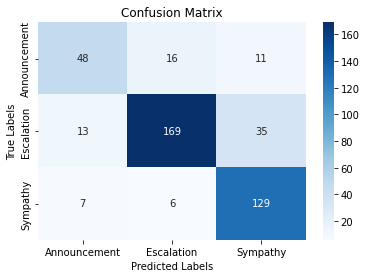

In [ ]:

# Evaluation Function

y_pred = []
y_true = []

model.eval().to(device)
with torch.no_grad():
    for i, batch in enumerate(tqdm(eval_dataloader)):
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs = model(**batch)
      batch_predictions = torch.argmax(outputs[1], 1)
      y_pred.extend(batch_predictions.tolist())
      y_true.extend(batch["labels"].tolist())

print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[2,1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[2, 1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.xaxis.set_ticklabels(['Announcement','Escalation', 'Sympathy'])
ax.yaxis.set_ticklabels(['Announcement','Escalation', 'Sympathy'])
    
# best_model = BERT().to(device)

# load_checkpoint(destination_folder + '/model.pt', best_model)



In [ ]:
eval_dataset = Dataset.from_pandas(df_test_Data)
eval_dataset = eval_dataset.map(encode, batched=True)
eval_dataset = eval_dataset.map(lambda examples: {'labels': examples['X']}, batched=True)
eval_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', "labels"])
eval_dataloader = torch.utils.data.DataLoader(eval_dataset, batch_size=32)
next(iter(eval_dataloader))

  0%|          | 0/150 [00:00<?, ?ba/s]

  0%|          | 0/150 [00:00<?, ?ba/s]

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[17028, 36819,  5891,  ..., 17029, 17029, 17029],
         [17028,  3109,   883,  ..., 17029, 17029, 17029],
         [17028,  1657,   883,  ..., 17029, 17029, 17029],
         ...,
         [17028,  2983,   883,  ..., 17029, 17029, 17029],
         [17028,  5605, 11384,  ..., 17029, 17029, 17029],
         [17028, 24537,    78,  ..., 17029, 17029, 17029]]),
 'labels': tensor([101189, 134473, 132305, 146885,  27892, 149531, 138733,  86017,  25015,
         115672,  73610,  16884,  55439,  18612,  79107,  72397,  95349, 138863,
         144366,  48953, 121034,  78590, 129121, 138311,  40153,  98528, 142506,
          30916, 144909,  14093,  87016, 109042]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 

In [ ]:
# eval dataset

y_inf = []
y_true = []
inputs_ids = []
IDS = []
inputs = []


model.eval().to(device)
with torch.no_grad():
    for i, batch in enumerate(tqdm(eval_dataloader)):
      # for k, v in batch.items():
      #   print(k)
      #   print(v)
      labels = {k: v.to("cpu") for k, v in batch.items() if k == "labels"}
      batch = {k: v.to(device) for k, v in batch.items() if k != "labels"}
      
      # print(batch)
      # print(labels)
      # print(batch["labels"])
      outputs = model(**batch)
      batch_predictions = torch.argmax(outputs[0], 1)
      
      y_inf.extend(batch_predictions.tolist())
      inputs_ids.extend(batch["input_ids"].tolist())
      IDS.extend(labels["labels"].tolist())
      # for input_id in inputs_ids:
      #   inputs.append([tokenizer.decode(input_id)]) 



100%|██████████| 4688/4688 [09:59<00:00,  7.82it/s]


In [ ]:
eval_dataset

Dataset({
    features: ['X', 'Text', 'Discourse', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 150000
})

In [ ]:
inputs = []
for input in inputs_ids:
  decoded_input = tokenizer.decode(input)
  cleaned_decoded_input = decoded_input.replace("[CLS]","").replace("[SEP]","").replace("[PAD]","").replace("[UNK]","")
  inputs.append(cleaned_decoded_input)
# 17028 17029

In [ ]:
output_dataframe = pd.DataFrame(
    {'Text': inputs,
     'Discourse': y_inf,
     "X": IDS
    })

In [ ]:
label_map = {
    0: 'Sympathy', 
    1: 'Escalation',
    2: 'Announcement',
}
#['Announcement','Escalation','Anger', 'Sympathy']

output_dataframe["Discourse"] = output_dataframe["Discourse"].apply(lambda x: label_map[x])

In [ ]:
output_dataframe

,Text,Discourse,X
0,سوداني الجوه وجداني السودان افريقيا ...,Escalation,101189
1,قسما عظما مهما ح تعمل نحن ح نبقي وانت ح تمشي ...,Escalation,134473
2,بطنا جابتك والله ما بتندم ...,Escalation,132305
3,دقو نقااارة غنو لي وطني البحبو انا ...,Escalation,146885
4,مسرحية ( مخربين في صيدلية ) ، بتثبت حقيقة وا...,Escalation,27892
...,...,...,...
149995,التصوير والتوثيق مهم جدا ياجماعه ماضروري كلوا...,Escalation,120328
149996,يوم الخميس نموت الشعب السودان ويحي الوطن.. ...,Escalation,149148
149997,جلاليب العيد كفن.. صلاة العيد جنازة!! كانت لي...,Escalation,47681
149998,هوووووي هوي هوي ...,Escalation,82094


In [ ]:
output_dataframe.to_csv("/content/drive/MyDrive/Shahd_project/third_inference_output.csv")

In [ ]:
output_dataframe['Discourse'].value_counts()

Escalation      92294
Announcement    41181
Sympathy        16525
Name: Discourse, dtype: int64